# CYPLAN255
### Urban Informatics and Visualization

HIT RECORD and TRANSCRIBE

# Lecture 12 -- APIs and Beyond <img src="https://i.imgur.com/HMHNjAq.jpg" width=550 align='right' title="Scottish child actress, Binkie Stuart (1932 - 2001) hand in hand with a penguin during a visit to London Zoo, 15th April 1937. (Photo by Fox Photos/Hulton Archive/Getty Images)">
******
March 7, 2022

# Agenda
1. Announcements
2. Review: APIs + JSON
2. Geocoding APIs
3. The Census API
4. Summary
5. For next time
6. Questions


# 1. Announcements

- Assignment 4 (project proposal + initial analysis) due March 13
- Final Project description released tonight
- How far we've come

## How Far We've Come

1. ~Fundamentals of Programming~
1. ~Intro to Data Analysis in Python~
1. ~Intro to Data Visualization~
1. APIs + Open Data
1. Working with Geospatial Data
1. Visualizing Spatial Data
1. Statistical Analysis + Machine Learning


# 2. Review: APIs + JSON

So far we've seen how you can use an API to download data stored as a .json file in some static location. That's cool, but ultimately not that different from clicking a link and downloading a file to your desktop. It also presumes you know the URL you want ahead of time, and that you want to download the entire file.

Today we're going to be seeing how you can use APIs to interact with _services_, i.e. APIs that perform operations and generate the data you want on demand. To continue with the restaurant analogy, we started off ordering fast food burgers, but now we're ready for the tasting menu at Chez Panisse.

<img src="https://i.kym-cdn.com/photos/images/original/001/474/943/b12.jpg" width=200 align="right">

But before we get there, let's quickly review what we've learned so far by checking out the USGS real-time earthquake data API.

### 2.1. USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


We'll start by querying the endpoint for magnitude 2.5+ quakes from the past week:

In [1]:
pip show pandas

Name: pandas
Version: 1.3.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\jffin\anaconda3\lib\site-packages
Requires: pytz, numpy, python-dateutil
Required-by: statsmodels, seaborn
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import json    
import requests
import pprint
pp = pprint.PrettyPrinter

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
print(response.text[:500])  #just looking at the first 500 characters

{"type":"FeatureCollection","metadata":{"generated":1647542323000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":305},"features":[{"type":"Feature","properties":{"mag":4.9,"place":"69 km SSW of Lata, Solomon Islands","time":1647530357758,"updated":1647535759040,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us6000h5f3","detail":"https://earthquake.usgs.


It looks like the results are a string with JSON-formatted data inside, so we'll parse the string into a Python dictionary using `json.loads()`:

In [3]:
data = json.loads(response.text)
data

{'type': 'FeatureCollection',
 'metadata': {'generated': 1647542323000,
  'url': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson',
  'title': 'USGS Magnitude 2.5+ Earthquakes, Past Week',
  'status': 200,
  'api': '1.10.3',
  'count': 305},
 'features': [{'type': 'Feature',
   'properties': {'mag': 4.9,
    'place': '69 km SSW of Lata, Solomon Islands',
    'time': 1647530357758,
    'updated': 1647535759040,
    'tz': None,
    'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000h5f3',
    'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000h5f3.geojson',
    'felt': None,
    'cdi': None,
    'mmi': None,
    'alert': None,
    'status': 'reviewed',
    'tsunami': 0,
    'sig': 369,
    'net': 'us',
    'code': '6000h5f3',
    'ids': ',us6000h5f3,',
    'sources': ',us,',
    'types': ',origin,phase-data,',
    'nst': None,
    'dmin': 4.49,
    'rms': 0.71,
    'gap': 102,
    'magType': 'mww',
    'type': 'earthquake',
 

Since JSON is just a dictionary, we can access subsets of the data with square brackets, using labels for the named elements in a key-value pair, and numerals for positional indexing of list items.

Hint: whenever you see a file that ends in `.geojson`, there's probably going to be an array called 'features' and you'll probably want to extract the data thats stored in the `features` dictionary:

In [4]:
quakes = data['features']  
quakes[0] #using indexing to give you the first list within 'features'

{'type': 'Feature',
 'properties': {'mag': 4.9,
  'place': '69 km SSW of Lata, Solomon Islands',
  'time': 1647530357758,
  'updated': 1647535759040,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000h5f3',
  'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000h5f3.geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 369,
  'net': 'us',
  'code': '6000h5f3',
  'ids': ',us6000h5f3,',
  'sources': ',us,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': 4.49,
  'rms': 0.71,
  'gap': 102,
  'magType': 'mww',
  'type': 'earthquake',
  'title': 'M 4.9 - 69 km SSW of Lata, Solomon Islands'},
 'geometry': {'type': 'Point', 'coordinates': [165.4715, -11.2594, 10]},
 'id': 'us6000h5f3'}

Because it is a nested dictionary at this point, we can use indexing into the dictionary to extract results.  Recall our earlier use of nested dictionaries? This is why we learned how to navigate nested dictionaries:

In [5]:
#if I want to grab all the earthquakes and then get specific attributes of each feature,
#I can use iteration.

for q in quakes:   
    print(q['properties']['title'])

M 4.9 - 69 km SSW of Lata, Solomon Islands
M 3.1 - 9 km N of Stanley, Idaho
M 3.1 - 7 km NNW of Stanley, Idaho
M 5.3 - 154 km NE of Thang, India
M 2.5 - 8 km WSW of New Market, Tennessee
M 5.2 - 142 km WNW of Naha, Japan
M 4.6 - 73 km SE of Ishinomaki, Japan
M 5.6 - 145 km WNW of Naha, Japan
M 2.9 - 24 km ENE of Beluga, Alaska
M 4.4 - 47 km N of Puerta de Corral Quemado, Argentina
M 4.7 - 79 km SSE of Ishinomaki, Japan
M 3.1 - 61 km N of Brenas, Puerto Rico
M 4.7 - northern Mid-Atlantic Ridge
M 4.2 - 7 km NW of Palora, Ecuador
M 2.8 - 19 km ENE of Honaunau-Napoopoo, Hawaii
M 2.7 - 65 km SSW of Kaktovik, Alaska
M 4.5 - northern Mid-Atlantic Ridge
M 4.7 - northern Mid-Atlantic Ridge
M 5.0 - 162 km N of Ishigaki, Japan
M 2.5 - 10km WNW of Alberto Oviedo Mota, B.C., MX
M 2.6 - 27 km ESE of Denali National Park, Alaska
M 3.4 - 39 km WSW of Stella, Puerto Rico
M 2.5 - 19km WNW of Morongo Valley, CA
M 2.8 - 8km SSE of Alberto Oviedo Mota, B.C., MX
M 4.1 - 128 km S of Shimoda, Japan
M 4.4 - 98

**SIDE BAR: GeoJSON?**

Working with geospatial data over the web, you will inevitably encounter called GeoJSON. GeoJSON is just JSON with a slightly more well-defined schema to distinguish between metadata, spatial features, and classes of spatial features (e.g. points vs. lines vs. polygons).

There's lots of great tools out there for working with GeoJSON, but chief among them is [geojson.io](https://geojson.io). It's an open source tool for quickly visualizing geojson. Comes preformatted with code waiting for you to enter a feature. So if working with geojson, can take the first however many elements and print them, and then take the string it produces in the output, copy and paste it into the geojson.io site, and then it'll give you output on a map. Lets you quickly render geojson in the browser. (can try it by copying the output from the cell below into the brackets on the website.

Try copying the first 5 entries from the quakes list into the `features` list on geojson.io and see what you find.

HINT: it's a little bit tricker to go from Python to JSON than from JSON to Python because Python doesn't care about single-quotes vs. double quotes, but JavaScript does. You can use the `json.dumps()` method to convert a Python dictionary to a valid JSON string that can be read in javascript. 

In [6]:
print(json.dumps(response.json()['features'][:5]))

[{"type": "Feature", "properties": {"mag": 4.9, "place": "69 km SSW of Lata, Solomon Islands", "time": 1647530357758, "updated": 1647535759040, "tz": null, "url": "https://earthquake.usgs.gov/earthquakes/eventpage/us6000h5f3", "detail": "https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000h5f3.geojson", "felt": null, "cdi": null, "mmi": null, "alert": null, "status": "reviewed", "tsunami": 0, "sig": 369, "net": "us", "code": "6000h5f3", "ids": ",us6000h5f3,", "sources": ",us,", "types": ",origin,phase-data,", "nst": null, "dmin": 4.49, "rms": 0.71, "gap": 102, "magType": "mww", "type": "earthquake", "title": "M 4.9 - 69 km SSW of Lata, Solomon Islands"}, "geometry": {"type": "Point", "coordinates": [165.4715, -11.2594, 10]}, "id": "us6000h5f3"}, {"type": "Feature", "properties": {"mag": 3.1, "place": "9 km N of Stanley, Idaho", "time": 1647527226211, "updated": 1647531384156, "tz": null, "url": "https://earthquake.usgs.gov/earthquakes/eventpage/us6000h5ew", "detail": "https:

In [8]:
for q in quakes: #reminding ourselves where bits of data are in the geojson
    break 
q

{'type': 'Feature',
 'properties': {'mag': 4.9,
  'place': '69 km SSW of Lata, Solomon Islands',
  'time': 1647530357758,
  'updated': 1647535759040,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us6000h5f3',
  'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us6000h5f3.geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 369,
  'net': 'us',
  'code': '6000h5f3',
  'ids': ',us6000h5f3,',
  'sources': ',us,',
  'types': ',origin,phase-data,',
  'nst': None,
  'dmin': 4.49,
  'rms': 0.71,
  'gap': 102,
  'magType': 'mww',
  'type': 'earthquake',
  'title': 'M 4.9 - 69 km SSW of Lata, Solomon Islands'},
 'geometry': {'type': 'Point', 'coordinates': [165.4715, -11.2594, 10]},
 'id': 'us6000h5f3'}

Extracting data from nested dictionaries might be a good job for **list comprehension**:

In [9]:
d = { #create a dictionary where:
    'magnitude': [q['properties']['mag'] for q in quakes], #for each q in quakes, go to the properties key and give me the magnitude, and 
    'depth': [q['geometry']['coordinates'][2] for q in quakes] # for each q in quakes, go to the geometry key, and then within that nested dictionary give me the coordinates key, and then give me the value in position 2 in the list of values (the third coordinate represents depth).
}
df = pd.DataFrame.from_dict(d) #create a dataframe from the dictionary I just made 

df.head() #look at the beginning

,magnitude,depth
0,4.9,10.00
1,3.1,10.00
2,3.1,10.00
3,5.3,10.00
4,2.5,19.57


In [10]:
print(df.describe())

       magnitude       depth
count  305.00000  305.000000
mean     4.00741   58.129317
std      0.94762  103.907122
min      2.46000    0.000000
25%      3.10000   10.000000
50%      4.20000   14.950000
75%      4.70000   54.180000
max      7.30000  589.580000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

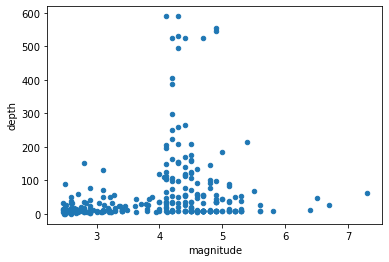

In [11]:
df.plot(x='magnitude', y='depth', kind='scatter')

# 3. Geocoding

Now on to the main course: geocoding APIs.

## 3.1. What is geocoding?

**Geocoding** describes the process of converting place names and addresses to geographic coordinates (e.g. lat/lon).

JFF -- different levels of accuracy -- behind the scenes the geolocating is interpolating/guessing where between points it knows your address falls. Sometimes it will give you a sort of level of confidence behind how sure the geocoding tool is about the location. (need some fuzzy tolerance0

<center><img src="https://dmpublisher.s3-us-west-2.amazonaws.com/old-dm/directionsmag.com/ee/images/newsletter/2004/10_20/EDramowicz_Figure1_lg.gif"></center>

Reverse geocoding is just the opposite process: using geographic coordinates to extract meaningful place names/addresses.

Perhaps this sounds like a dull topic, but **geocoding is a fundamental tool for anyone wishing to do spatial data analysis**.

Why? 

- 9 times out of 10, your data will have _either_ geographic coordinates _or_ administrative boundary names, but not both!
- 9 times out of 10 you will want to use additional data sources for which the above statement also applies
- Geocoding allows you to translate between the two (e.g. merging Census data into Craiglist rental listings)

#helps you align/join and combine data to have a more complete dataset since different datasets will use different variable names/data formats

## 3.2 Geocoding with the Mapbox API

Services like Google Maps and Mapbox have various APIs that let you access its services through code instead of through GUI apps. This one from Mapbox lets you look up the latitude-longitude coordinates of street addresses. You'll need to create a Mapbox API token in order to use this API, which you can do by following the instructions [here ](https://www.mapbox.com/signin/?route-to=%22/account/access-tokens%22) if you have not alread done so.


The Mapbox API queries work just like the ones we've already seen, but now we're including our own query parameters in the URL endpoint!

**API documentation:**  
https://www.mapbox.com/api-documentation/#geocoding

**API endpoint:**  
https://api.mapbox.com/geocoding/v5/mapbox.places

**API endpoint with query parameters:**  
https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster+Hall.json?access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w

### 3.2.1. A word about API keys, tokens, and passwords in general

It's never a good idea to print an API key in a public document, including a script or notebook like this one. Particularly when you're using Git, deleting private data after you've already committed the change won't remove the data from your project history!

Instead, its good practice to create a small .json file which you can read into Python without ever having to print its contents. In this case, let's use a text editor to create a file named **mapbox_api_key.json** and put it in the `data/` directory. It's contents should look like this:

#open a text editor and create a data dictionary with "key" as the key and your token as a value. From jupyter notebook, you can do open "text file" too, and say .json at the end of the file name. 

```javascript
{"key": "<your API key here>"}
```

Now we can read the API key from disk:



In [12]:
import json  
with open("data/mapbox_api_key.json", 'r') as f:  #with open is standard python syntax for opening any file in a binary format (literally in 1s and 0s). 
                                                  #to make a json file, just save it with the .json file extension (instead 
                                                  #of as .txt, for example)
                                                  #'r' means "in read mode"

    key_file = f.read()   #f.read is the way to convert the file into meaningful readable objects. 
    
my_api_key = json.loads(key_file)['key']    #update this code to work with whatever I do to create/save my token, otherwise
#none of the code cells below will run.

### 3.2.2. Constructing an API query
Now we're ready to format our API request. 


JFF-- since we've pulled in our mapbox api key, now we can prepare our request for data from the endpoint URL.

In [13]:
import requests  #we're using the requests library here to query their API

base_url = 'https://api.mapbox.com/geocoding/v5/mapbox.places/'  #this is their endpoint
address = 'Wurster Hall'
params = {
    'limit': 1,  # just get the first record/feature
    'access_token': my_api_key}

url = requests.Request('GET', base_url + address + '.json', params=params).prepare().url   
#using requests.Request and telling 
#it to do a get request. This is what happens behind request.get, 
#but by using this lower level function, we can specify more parameters, which in this case is our dictionary of API query parameters.
#It also allows us to use the .prepare() method. This just gives us the 
#URL that we want. Takes base url, appends the address, and 
#then tells it to append the .json extension. There are certain characters that an http request doesn't recognize, like
#white space (e.g., in Wurster Hall), so .prepare() takes it and makes it a valid http request url. 

#In the output, the %20 is the code for white space. The "?" is 
#how API distinguishes between endpoint and the API parameters. 

This looks a little more complicated than what we saw last class. The main reason for this is that we are now doing more than simply submitting a `GET` request to URL whose full endpoint we know in advance -- this time we are also sending data in addition to getting data (e.g., the API key, telling it to limit our results to just the first result). Instead, we just know the base URL of our API, and are using strings and key-value pairs to format the rest of the endpoint. This is pretty straightforward with one exception: HTTP doesn't know how to handle white space `" "` and many other special characters. So we are relying on the `Request.prepare()` method to take our input data and format it into a string that can be understood by HTTP.

You can try printing the url in the cell below to see what this formatted version of the URL looks like, but be careful because it will contain your API key!

#print(url)     #not printing this so won't print API key

### 3.2.3. Making the request and parsing the response

#now that we've prepared our request (i.e., url above), we're going to pass it to requests.get, and parse the response.

In [14]:
from pprint import PrettyPrinter as pp
response = requests.get(url)
results = response.text
data = json.loads(results)
data   #we only have one feature in the output below because we told it to limit to one, and it gives us everything the Mapbox API has about Wurster Hall.

{'type': 'FeatureCollection',
 'query': ['wurster', 'hall'],
 'features': [{'id': 'poi.472446416066',
   'type': 'Feature',
   'place_type': ['poi'],
   'relevance': 1,
   'properties': {'foursquare': '4b56554cf964a520ce0b28e3',
    'landmark': True,
    'address': '230 Wurster Hall #1820',
    'category': 'college art building, building'},
   'text': 'Wurster Hall / College of Environmental Design',
   'place_name': 'Wurster Hall / College of Environmental Design, 230 Wurster Hall #1820, Berkeley, California 94704, United States',
   'center': [-122.254883, 37.870818],
   'geometry': {'coordinates': [-122.254883, 37.870818], 'type': 'Point'},
   'context': [{'id': 'neighborhood.12468009734905880',
     'text': 'University of California'},
    {'id': 'postcode.13849498828668840', 'text': '94704'},
    {'id': 'place.9820619379990170',
     'wikidata': 'Q484678',
     'text': 'Berkeley'},
    {'id': 'district.11187960009291250',
     'wikidata': 'Q107146',
     'text': 'Alameda County'},

Does anyone think they have what it takes to extract the coordinates from our API response data?

In [ ]:
#to explore a dictionary, often helpful to do data.keys() to figure out what first set of keys are. That will tell you if you need to go 
#below initial level to get what you are looking for. 
#Could do, e.g., data['features'][0]['center'] to get the info on the coordinates without having to go one level below at geometry.

##try making a function per below to pass in the name of a place and get the coordinates without all the extra data

### 3.2.5 Exercises

1. Search for some other addresses or landmarks!
2. Try storing your code as a function named `get_coords()` so that you need only supply a place name and your function will return the coordinates as list or tuple:
   ```python
    def get_coords(place_str):
        
        # do something with "place_str"
        
        return coords
        
   ```
2. Take a look at the [API documentation](https://www.mapbox.com/api-documentation/#geocoding). Can you figure out how to retrieve other points of interest near Wurster Hall?

In [15]:
%%html 
<iframe style="border-radius:12px" src="https://open.spotify.com/embed/track/2KnJ183quw14FCd3Lb3pqL?utm_source=generator" width="30%" height="80" frameBorder="0" allowfullscreen="" allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture"></iframe>

### 3.2.4. The Mapbox SDK

We can manually construct our urls the way we did above, but Mapbox also maintans its own Python package which makes it a little easier to execute HTTP requests against its API. You can find the documentation [here](https://mapbox-mapbox.readthedocs-hosted.com/en/latest/index.html)

NOTE: the Mapbox Python API seems to be a bit buggy. In particular it doesn't seem to support Python > 3.9. If you encounter any issues trying to import modules from this library, the best thing to do is to roll back your Python version for this part of the tutorial. From a terminal, you can do:

```bash
conda install python=3.9
```

and then restart your notebook kernel using the Kernel drop down menu in the menu panel above (or by typing `00` in rapid succession in command mode).

#### 3.2.4.1. Forward Geocoding

Forward geocoding is the one we have looked at so far using an API endpoint.  It takes an address or a place name and returns the geographic (lat/long) coordinates of that location.  Let's look at it again using the Mapbox Python SDK.

In [18]:
from mapbox import Geocoder
import os

geocoder = Geocoder(access_token=my_api_key) #passing API key to geocoder object. This instantiates geocoder object, so after that
#don't have to pass api key after that since it's built into the object (or something like that)

OK, now we can get to work on the geocoding... let's try geocoding Freehouse Restaurant, which is at 2700 Bancroft Way.

In [19]:
#this is basically a python package Mapbox created that includes a function that does what we were trying to do before

response = geocoder.forward('2700 Bancroft Way, Berkeley, CA 94704', limit=1)
data = response.json()
data

{'type': 'FeatureCollection',
 'query': ['2700', 'bancroft', 'way', 'berkeley', 'ca', '94704'],
 'features': [{'id': 'address.1848437491840652',
   'type': 'Feature',
   'place_type': ['address'],
   'relevance': 1,
   'properties': {'accuracy': 'parcel'},
   'text': 'Bancroft Way',
   'place_name': '2700 Bancroft Way, Berkeley, California 94704, United States',
   'center': [-122.254267, 37.868965],
   'geometry': {'type': 'Point', 'coordinates': [-122.254267, 37.868965]},
   'address': '2700',
   'context': [{'id': 'neighborhood.14897580184476970',
     'text': 'South Campus'},
    {'id': 'postcode.13849498828668840', 'text': '94704'},
    {'id': 'place.9820619379990170',
     'wikidata': 'Q484678',
     'text': 'Berkeley'},
    {'id': 'district.11187960009291250',
     'wikidata': 'Q107146',
     'text': 'Alameda County'},
    {'id': 'region.9803118085738010',
     'short_code': 'US-CA',
     'wikidata': 'Q99',
     'text': 'California'},
    {'id': 'country.19678805456372290',
    

Another random address to geocode:

In [20]:
response = geocoder.forward('120 East 13th Street, Manhattan, New York, New York 10003', limit = 1) #trying another random address
first = response.json()['features'][0] #load the response as json, take the first feature, and parse the name and the coordinates
print(first['place_name'])
print([coord for coord in first['geometry']['coordinates']])

120 East 13th Street, New York, New York 10003, United States
[-73.98893, 40.73295]


#### 3.2.4.2 Creating a dataframe from multiple API queries

Can you think of a good way to write a loop to geocode those addresses and add them to a dataframe?  Let's try one way to do this.

In [21]:
#something you can't do from the browser is create a list of addresses and geocode them all at the same time, but we 
#can code to do that. In the next two cells, we create a variable with a list of addresses and an empty dataframe, and then write 
#a function to loop through the addresses, geocode them, and add them to our dataframe. (#this is one way to do multiple addresses at the same time.)

import pandas as pd
data = pd.DataFrame(index=[],columns=['address','lat','lon']) #here we are instantiating an empty dataframe
# and telling to make three columns. Then in the next cell we loop through our three addresses and pass them one at a time.

addrs = [
    '3028 Regent St., Berkeley, California, 94705',
    '1511 Julia St, Berkeley, California, 94703',
    '2700 Bancroft, Berkeley, California, 94704']




In [22]:
for i in range(len(addrs)):  #three addresses, so length is 3 rows. will run 3 times.
    geoadress=geocoder.forward(addrs[i], limit = 1).geojson()['features'][0]['geometry']['coordinates']
    data.loc[i, 'address']=addrs[i] #in my dataframe, address is the item from my list
    data.loc[i, 'lon']=geoadress[0]
    data.loc[i, 'lat']=geoadress[1]
data

#saying for each item in the dataframe, pass the address through the geocoder, give me the first feature as a geojson, 
#and give me the coordinates. For i in range(len(addrs)) --> says for each item in the range, which is 3 because I 
#have 3 addresses, #give me these things. So looping through my addresses and getting the 
#info that I want. Merging the inputs and the outputs into a dataframe.

,address,lat,lon
0,"3028 Regent St., Berkeley, California, 94705",37.854475,-122.256705
1,"1511 Julia St, Berkeley, California, 94703",37.854495,-122.27862
2,"2700 Bancroft, Berkeley, California, 94704",37.868965,-122.254267


#### 3.2.4.3 Reverse Geocoding

Reverse geocoding does what it sounds like. It takes coordinates and returns an address or other place type.  Options for place type include: country, region, postcode, district, place, locality, neighborhood, address,and poi.

Let's start by using the coordinates of the address we just got from forward geocoding, and get the address back from reverse geocoding of those coordinates.

In [23]:
response = geocoder.reverse(lat=37.868965, lon=-122.254267) #in this case these are coordinates we got out of geocoding, so 
#we can be pretty sure it's accurate. But reverse geocoding can be less accurate since multiple things/places can be associated 
#with a latitude/longitude
features = response.geojson()['features']
features

[{'id': 'address.1848437491840652',
  'type': 'Feature',
  'place_type': ['address'],
  'relevance': 1,
  'properties': {'accuracy': 'parcel'},
  'text': 'Bancroft Way',
  'place_name': '2700 Bancroft Way, Berkeley, California 94704, United States',
  'center': [-122.2542675, 37.868965],
  'geometry': {'type': 'Point', 'coordinates': [-122.2542675, 37.868965]},
  'address': '2700',
  'context': [{'id': 'neighborhood.14897580184476970', 'text': 'South Campus'},
   {'id': 'postcode.13849498828668840', 'text': '94704'},
   {'id': 'place.9820619379990170', 'wikidata': 'Q484678', 'text': 'Berkeley'},
   {'id': 'district.11187960009291250',
    'wikidata': 'Q107146',
    'text': 'Alameda County'},
   {'id': 'region.9803118085738010',
    'short_code': 'US-CA',
    'wikidata': 'Q99',
    'text': 'California'},
   {'id': 'country.19678805456372290',
    'wikidata': 'Q30',
    'short_code': 'us',
    'text': 'United States'}]},
 {'id': 'neighborhood.14897580184476970',
  'type': 'Feature',
  'p

In [24]:
for f in features: #looping through results and saying for each item in features, grab the place type and the place name
    print('{place_type[0]}'.format(**f) + ':', '{place_name}'.format(**f))

address: 2700 Bancroft Way, Berkeley, California 94704, United States
neighborhood: South Campus, Berkeley, California, United States
postcode: Berkeley, California 94704, United States
place: Berkeley, California, United States
district: Alameda County, California, United States
region: California, United States
country: United States


### Bonus Section: Getting Directions from Mapbox

You can put in start and end locations and call the Mapbox directions API to get suggested directions as a sequence of coordinates you could plot on a map.

In [25]:
#work through this on our own to see how the directions API from Mapbox works. He started it, but not completed.

In [26]:
from mapbox import Directions
help(Directions)

Help on class Directions in module mapbox.services.directions:

class Directions(mapbox.services.base.Service)
 |  Directions(access_token=None, host=None, cache=None)
 |  
 |  Access to the Directions v5 API.
 |  
 |  Method resolution order:
 |      Directions
 |      mapbox.services.base.Service
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  directions(self, features, profile='mapbox/driving', alternatives=None, geometries=None, overview=None, steps=None, continue_straight=None, waypoint_snapping=None, annotations=None, language=None, **kwargs)
 |      Request directions for waypoints encoded as GeoJSON features.
 |      
 |      Parameters
 |      ----------
 |      features : iterable
 |          An collection of GeoJSON features
 |      profile : str
 |          Name of a Mapbox profile such as 'mapbox.driving'
 |      alternatives : bool
 |          Whether to try to return alternative routes, default: False
 |      geometries : string
 |          Type of geomet

In [27]:
service = Directions()

origin = {
        'type': 'Feature',
        'properties': {'name': 'Portland, OR'},
        'geometry': {
        'type': 'Point',
        'coordinates': [-122.7282, 45.5801]}}
destination = {
    'type': 'Feature',
    'properties': {'name': 'Bend, OR'},
    'geometry': {
    'type': 'Point',
    'coordinates': [-121.3153, 44.0582]}}

In [29]:
#this doesn't work; Max was going to update it but as of 3/17/22 not updated


#response = service.directions([origin, destination],'mapbox/driving')
#driving_routes = response.geojson()
#driving_routes

In [ ]:
%%html

<iframe style="border-radius:12px" src="https://open.spotify.com/embed/track/2KnJ183quw14FCd3Lb3pqL?utm_source=generator" width="30%" height="80" frameBorder="0" allowfullscreen="" allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture"></iframe>

## 3.3 Geocoding with Nominatim

Open source rules! Nominatim is an open source geocoding platform that is managed by OpenStreetMap (I think). Try using the Nominatim API to geocode or reverse geocode some data of interest! You can find the Nominamtim docs [here]. (https://nominatim.org/release-docs/develop/api/Search/)

JFF -- It has its own API endpoint and own syntax for passing parameters through it. Doesn't require an API key since its open source, but they have some kind of limit on how many things you can do/request. Works the same as Mapbox API but no key required. Can specify the output format (look in the docs)

Hint: whenever you're using an API for the first time, its always a good idea to start by trying to find some example queries in the documentation, and then tweaking them to meet your needs. 

In [30]:
#Here, wurster hall is our query string. He prepared our url request, which includes the 
#endpoint url, says give me address details, and formats the results parameters, and then passes it 
#through requests


query_str = 'wurster hall'
url = "https://nominatim.openstreetmap.org/?addressdetails=1&q={0}&format=json&limit=1".format(query_str)
res = requests.get(url)

In [31]:
res.json()

[{'place_id': 283158268,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 6415953,
  'boundingbox': ['37.870117', '37.8710312', '-122.2552795', '-122.25431'],
  'lat': '37.8705723',
  'lon': '-122.25489935163237',
  'display_name': 'Bauer Wurster Hall, Wurster Courtyard, Southside, Berkeley, Alameda County, California, 94720-1076, United States',
  'class': 'building',
  'type': 'university',
  'importance': 0.201,
  'address': {'building': 'Bauer Wurster Hall',
   'road': 'Wurster Courtyard',
   'neighbourhood': 'Southside',
   'city': 'Berkeley',
   'county': 'Alameda County',
   'state': 'California',
   'postcode': '94720-1076',
   'country': 'United States',
   'country_code': 'us'}}]

## 3.4 Exercise - Reverse geocoding with the FCC's API

FCC's API is helpful for getting Census FIPS codes from addresses/latitude-longitude data. CEnsus FIPS codes are also sometimes called GeoIDs. It's how the CEnsus defines the geographic hierarchy of places it keeps track of in its questionnaires

Let's load the Craigslist rental listings again and quickly clean it up using the same code we previously used:

In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/bay.csv')

# clean price and neighborhood
df.price = df.price.str.strip('$').astype('float64')
df.neighborhood = df.neighborhood.str.strip().str.strip('(').str.strip(')')

# break out the date into month day year columns
df['month'] = df['date'].str.split().str[0]
df['day'] = df['date'].str.split().str[1].astype('int32')
df['year'] = df['date'].str.split().str[2].astype('int32')
del df['date']

# extract bedrooms and square footage
def clean_bdrm(value):

    if isinstance(value, str):
        end = value.find('br')

        if end == -1:
            return
        
        else:
            start = value.find('/') + 2
            return int(value[start:end])

    else:
        return
    
def clean_sqft(value):

    if isinstance(value, str):
        end = value.find('ft')
        
        if end == -1:
            return

        else:
            if value.find('br') == -1:
                start = value.find('/') + 2
            else:
                start = value.find('-') + 2

            return int(value[start:end])

    else:
        return
    
df['sqft'] = df['beds_sqft'].map(clean_sqft)
df['bedrooms'] = df['beds_sqft'].map(clean_bdrm)
df.head()

,neighborhood,title,price,beds_sqft,pid,longitude,subregion,link,latitude,month,day,year,sqft,bedrooms
0,bayview,Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,950.0,/ 1br -,4076905111,-122.396965,SF,/sfc/apa/4076905111.html,37.761216,Sep,18,2013,NaN,1.0
1,bayview,Only walking distance to major shopping centers.,950.0,/ 1br -,4076901755,-122.396793,SF,/sfc/apa/4076901755.html,37.761080,Sep,18,2013,NaN,1.0
2,bayview,"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",950.0,/ 1br -,4076899340,-122.397100,SF,/sfc/apa/4076899340.html,37.762100,Sep,18,2013,NaN,1.0
3,financial district,"*NEW* Beautiful, Upscale Condo in Historic Jac...",3300.0,/ 1br - 830ft² -,4067393707,-122.399747,SF,/sfc/apa/4067393707.html,37.798108,Sep,18,2013,830.0,1.0
4,visitacion valley,楼上全层3房,2000.0,/ 3br - 1280ft² -,4076901071,NaN,SF,/sfc/apa/4076901071.html,NaN,Sep,18,2013,1280.0,3.0


And now let's use the FCC [Census Block Conversions API](https://geo.fcc.gov/api/census/) to turn lat/long into a block FIPS code. FIPS codes contain from left to right: the location's 2-digit state code, 3-digit county code, 6-digit census tract code, and 4-digit census block code (the first digit of which is the census block group code). With a FIPS code in hand, you can easily merge your data against Census records. 

JFF -- in a previous notebook he had already done the steps below to include the long/lat data, but this shows us how he did it behind the scenes so we can do it ourselves. FCC doesn't require an API key, so free and anyone can use it, but don't abuse it and act like a bot and send hundreds of requests in a couple minutes. They might freeze us out by blocking IP address. But at home, practice forming URL queries on just a couple rows at a time for these rental listings. Don't keep testing the code on the entire dataset. Might want to print the row you are processing, maybe every 10th row to avoid getting an error at the end after it takes forever to process so you don't have to start all over. Do that using some conditional code that says something like "if the request fails, then go on to the next record, else continue". 

Here's a sample API query to get you started:

In [33]:
lat = 34.537094
lon = -82.630303
url = 'https://geo.fcc.gov/api/census/block/find?latitude={0}&longitude={1}&format=json'.format(lat, lon)
response = requests.get(url)
data = response.json()
data

{'messages': ["FCC0001: The coordinate lies on the boundary of mulitple blocks, the block contains the clicked location is selected. For a complete list use showall=true to display 'intersection' element in the Block"],
 'Block': {'FIPS': '450070003003016',
  'bbox': [-82.636071, 34.535894, -82.630107, 34.539854]},
 'County': {'FIPS': '45007', 'name': 'Anderson County'},
 'State': {'FIPS': '45', 'code': 'SC', 'name': 'South Carolina'},
 'status': 'OK',
 'executionTime': '0'}

Your job now is to write some Python code to get the FIPS code for every row in the Craigslist rental data, and store that FIPS code as a new column in the dataframe. You might consider using [`df.iterrows()`](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.iterrows.html) to loop through each row of the dataframe one at a time, or if you're feeling fancy, you could define a function and use a vectorized approach (e.g. `df.apply()` or `df.map()`) to run the function on each row of your dataframe without any loops at all!

**CAUTION: PLEASE DO NOT RUN THIS IN CLASS!!!** If we are all doing this at the same time on the same internet connection, you might get our IP address blacklisted by querying the API too many times.

A few tips:
- Since the API is SLOW for processing a lot of records, and works one record at a time, test out your code using only a few records until you are positive you have it working correctly. It may take several minutes to grind through all the records. You might want to print the row you are processing...maybe every 10th row, to give you some sense of how it is progressing.
- Watch out for those missing lat-longs. You'll probably want to skip them since the API won't know what to do with them.
- Consider adding some conditional logic to handle failed HTTP requests. This will prevent you from having to start your iteration over every time your program encounters an error

In [ ]:
%%html
<iframe style="border-radius:12px" src="https://open.spotify.com/embed/track/5kqMiwRHsewDj42jxMJSeW?utm_source=generator" width="40%" height="80" frameBorder="0" allowfullscreen="" allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture"></iframe>

# 4. The Census API

Whatever "Urban Informatics" is or isn't, more often than not you'll find it useful to refer to census data. In this course, we'll be looking at capital-C Census data, i.e. the US Census, if for no other reason than the fact that it is being taught at UC Berkeley which happens to be located in California which happens to be located in the United States. Also, US Census data rocks!

**Question**: Does anyone know of other countries that have good, publically available census data?

The US Census provides API endpoints for most of its public data. You can find a list of them, along with links to their documentation, [here](https://www.census.gov/data/developers/data-sets.html). 

JFF -- all of the surveys have their own APIs and therefore their own APIs endpoints. Below we are looking at the 5-year ACS data. 

You can use those endpoints to construct your own custom queries and get the data you want by sending HTTP requests to those URLs. For example, to get the total population from 2018 in Alameda County, you can do:

In [34]:
# define parameters (Variables) of our API query
acs_var = 'B01001_001E'  # total pop
state = '06'  # CA
counties = ['001', '075']  # Alameda and SF
year = 2018 #2018 5-year data

# format the URL/prepare the request
counties_str = ','.join(counties)
url = "https://api.census.gov/data/{0}/acs/acs5?get={1}&for=county:{2}&in=state:{3}".format(
    year, acs_var, counties_str, state)

# execute the HTTP request
res = requests.get(url)
pd.DataFrame(res.json())


#output is population of san francisco county and alameda county

,0,1,2
0,B01001_001E,state,county
1,870044,06,075
2,1643700,06,001


## 4.1. Getting a Census API key
A word of warning. These Census API queries may or may not work for you without specifying an API key. It's probably a good idea to get one anyways, because you will eventually be asked for it after enough queries. You can do that [here](https://api.census.gov/data/key_signup.html)

JFF -- not always needed for Census API, but sometimes you may need an API key, so a good idea to get one. The docs explain how.

## 4.2. Census API Python Library


Just like with Mapbox, can format our requests manually OR use a library that has been created to make the process easier. Here, can use the census and us packages, which were created by DataMade

One of the great things about working with open source software and open data is that people are publishing useful tools all the time that you can use to make your life easier. In the case of Census data, there are multiple Python libraries to choose from which are designed to make it a little easier to interact with the Census API.

We'll focus on one that's simply called [census](https://github.com/datamade/census). You _will_ need a Census API key to use this package.

Use the instructions on that GitHub repo to use `pip` to install the `census` package, along with its sister package `us`.

JFF -- install the census package. 

Re: pip install vs. conda install:
Anaconda and Conda are relatively new on python scene. Before that there was really only pip to do package installs in python. It still exists, and in many cases certain libraries are only published on pip and not conda. So you can try to install with conda, but may or may not work. Depends if conda has converted the sourcecode for installation from pip repo over to conda or not. So some packages may not be install-able in conda. So conda and pip are just different repositories of python packages. Some packages available on both, some only on one or the other. Import pip into a conda environment, which then lets you use other python libraries. 

Every time Max creates a new conda environment (follow his instructions!), he always does "conda install" python, ipython, the conda kernels, and pip (since pip lets you install other libraries)

In [ ]:
#conda install pip

In [ ]:
#pip install census

In [ ]:
#pip install us

In [36]:

#this code won't work because I haven't defined my census_key. The code here uses Max's stored API key, which I don't have access to here.


#from census import Census
#from us import states


# Max stores his API key stored as an environment variable rather than a .json file. An environment 
#variable is an alternative to storing it as a flat .json file like before. 

#census_key = os.getenv("CENSUS_API")  

#c = Census(census_key, year=year)
#res = c.acs5.get(('NAME', acs_var), {'for': 'county:{}'.format(counties_str),'in': 'state:{}'.format(states.CA.fips)
#})

#pd.DataFrame(res)

In [ ]:
#this code won't work for same reason as above

#acs_df = pd.DataFrame()

#for year in range(2010, 2018):
#    c = Census(census_key, year=year)
#    res = c.acs1.get((
 #       'NAME', acs_var), {
  #      'for': 'county:{}'.format(counties_str),
   #     'in': 'state:{}'.format(states.CA.fips)
    #})

    #year_df = pd.DataFrame(res)
    #year_df['year'] = year
    #acs_df = pd.concat((acs_df, year_df), ignore_index=True)

In [ ]:
#this code won't work because previous cells didn't run, but it
#plots the census data. If wanted to, could merge the census data 
#and the rental data and plot that to see if there are correlations

#import seaborn as sns
#sns.lineplot(data=acs_df, x='year', y=acs_var, hue='NAME') 




## 4.3 More exercises!

Your turn: 
1. Look up the latitude and longitude of your home address using forward geocoding
2. Use the latitude and longitude from that to get the census block of your home address
3. Challenge problem: create a dataframe with 3 street addresses and a description column with labels for these locations, and write code that will iterate through them, get the latitude and longitude for each, and the FIPS block code, County name, and write these addresses, lat and long, and FIPS Block code and County names to a dataframe.

In [ ]:
%%html
<iframe style="border-radius:12px" src="https://open.spotify.com/embed/track/4KBULZasCMBDKHY8IPUCML?utm_source=generator" width="40%" height="80" frameBorder="0" allowfullscreen="" allow="autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture"></iframe>

# 5. Summary

By this point in the class you have all the tools you need to:
1. find interesting data sets
1. load them into Python
1. explore, clean, and manipulate that data
1. combine it with external administrative or demographic data from the Census
1. create charts and visualizations to communicate your findings
1. save your new data to disk so you can come back to it later

# 6. For next time

- We're about to enter my favorite module of this course: **Working with Geospatial Data**. Some of you have considerable experience with GIS already, and are very comfortable with concepts like coordinate reference systems and map projections, and how to deal with these when working with spatial data.  If so, you might not need to spend much time with the readings for next session, but if not, please at least familiarize yourself with the material from the first two links on the syllabus:
  - [mapschool.io](https://mapschool.io/)
  - Part I of [Geographic Data Science with Python](https://geographicdata.science/book/notebooks/00_toc.html)

- We will also be using the GeoPandas Python library, so browse the documentation [here](http://geopandas.org/) and install it ahead of time.

In [ ]:
pip install geopandas

# 7. Questions?